In [1]:
import datetime
import glob
import numpy as np
import pandas as pd

from utils_plotting import plot_spread_analysis

In [2]:
csv_files = glob.glob('./data/meli-*-cleaned.csv')
dfs = []

for file in csv_files:
    print(f'appending data from {file}')
    df = pd.read_csv(file)
    dfs.append(df)

appending data from ./data/meli-2025-07-07-cleaned.csv


In [3]:
combined_df = pd.concat(dfs, ignore_index=True)

In [4]:
# See https://docs.python.org/3/library/datetime.html
# The hour is not zero padded, so %-I
combined_df['DateTime'] = pd.to_datetime(
    combined_df['Date'] + ' ' + combined_df['Time'],
    format='%m/%d/%Y %I:%M %p',
)

In [5]:
# Remove duplicates keeping the first occurrence.
clean_df = combined_df.drop_duplicates(subset=['DateTime'], keep='first')

# Sort by timestamp to ensure proper chronological order.
clean_df = clean_df.sort_values('DateTime').reset_index(drop=True)

In [6]:
clean_df.to_csv('./data/meli_combined_price_data.csv', index=False)

In [7]:
df = pd.read_csv('./data/meli_combined_price_data.csv')

df['DateTime'] = pd.to_datetime(df['DateTime'])

In [8]:
df.tail(1)

,Date,Time,Open,High,Low,Close,Volume,Simple Moving Average - SMA - SMA(20),Simple Moving Average - SMA - SMA(50),Simple Moving Average - SMA - SMA(200),"Exponential Moving Average - EMA - EMA(9,Modern)","Exponential Moving Average - EMA - EMA(61,Modern)",Relative Strength Index - RSI - RSI(14),"MACD - MACD(12,26,9)",MACD - Histogram,"MACD - Signal Line(MACD(12,26,9),9,Modern)",DateTime
509,07/07/2025,7:07 PM,2495.0,2495.0,2495.0,2495.0,100,2490.8455,2484.58564,2487.585074,2494.76976,2486.087125,57.364249,3.978457,0.033464,3.944993,2025-07-07 19:07:00


In [9]:
df['DateTime'].iloc[0]

Timestamp('2025-07-01 16:00:00')

In [10]:
np.flip( df['DateTime'].dt.date.unique() )

array([datetime.date(2025, 7, 7), datetime.date(2025, 7, 3),
       datetime.date(2025, 7, 2), datetime.date(2025, 7, 1)], dtype=object)

using 2025-07-03 as previous date
prev day close: 2514.05
price at close: 2495.0
first time: 2025-07-07 09:31:00, last time: 2025-07-07 19:07:00
closest time index for 09:30:00 on 2025-07-07: 0
closest time index for 09:45:00 on 2025-07-07: 9
closest time index for 15:00:00 on 2025-07-07: 132


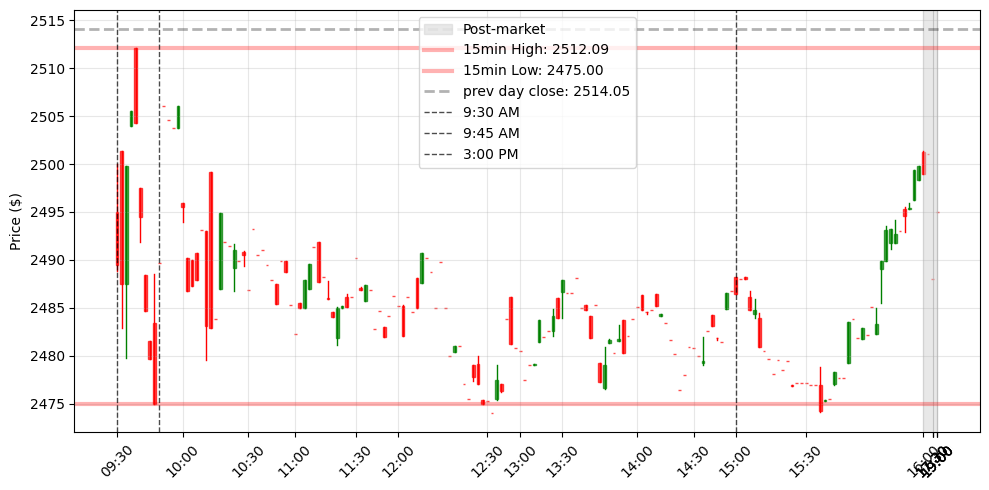

In [11]:
plot_spread_analysis(df, datetime.date(2025, 7, 7))

using 2025-07-02 as previous date
prev day close: 2477.99
price at close: 2514.05
first time: 2025-07-03 08:33:00, last time: 2025-07-03 13:01:00
closest time index for 09:30:00 on 2025-07-03: 1
closest time index for 09:45:00 on 2025-07-03: 13
closest time index for 15:00:00 on 2025-07-03: 118


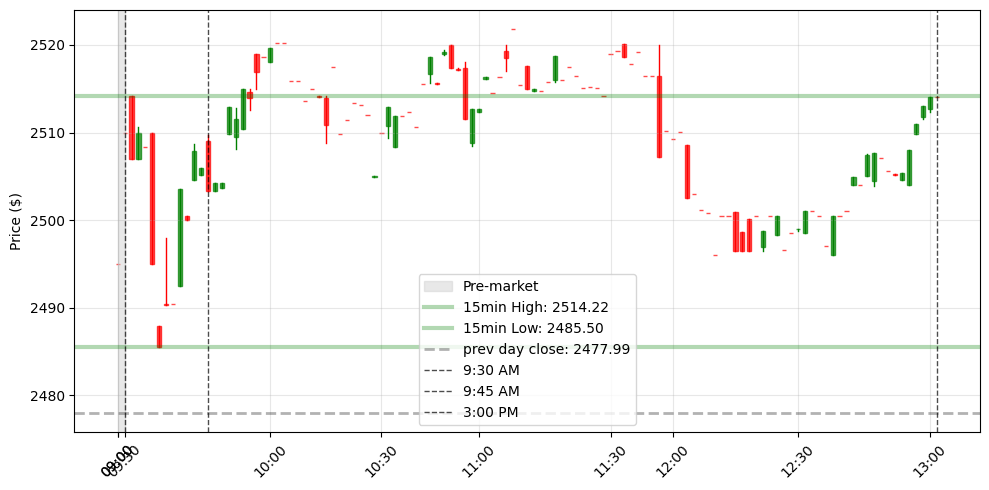

In [12]:
plot_spread_analysis(df, datetime.date(2025, 7, 3))

using 2025-07-01 as previous date
prev day close: 2501.4
price at close: 2477.99
first time: 2025-07-02 09:22:00, last time: 2025-07-02 19:44:00
closest time index for 09:30:00 on 2025-07-02: 1
closest time index for 09:45:00 on 2025-07-02: 12
closest time index for 15:00:00 on 2025-07-02: 176


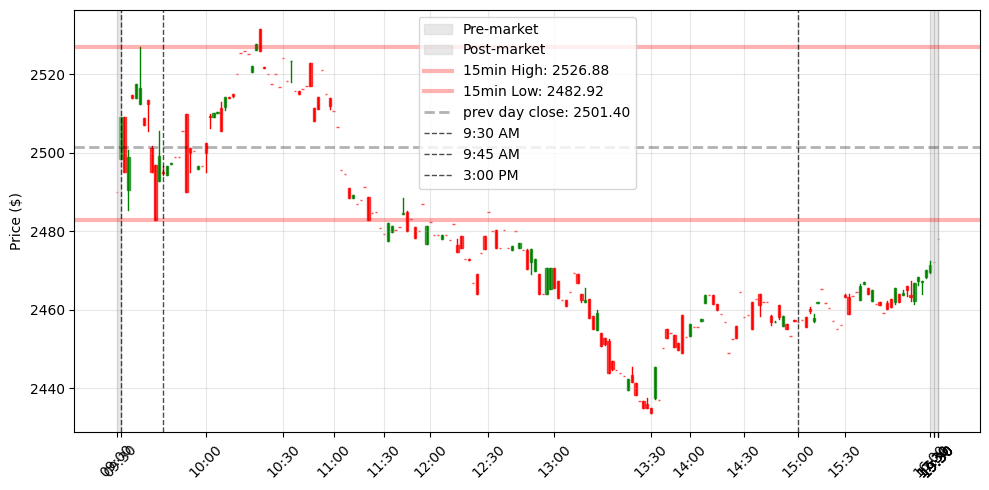

In [13]:
plot_spread_analysis(df, datetime.date(2025, 7, 2))